The following notebook is to implement various steps in Machine Learning Pipeline.

#### Data fields
#### Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target

variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

Covers the following:
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining predictions

This project used open source data from Kaggle.com (House Price Dataset)

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For the yeo-johnson transformation
import scipy.stats as stats

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [85]:
# Load Datase
data = pd.read_csv("train.csv")

# Rows and columns of dataset
print(data.shape)

# Visualize dataset
data.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
# We can drop the Id column its just a number to identify each house
# and the model does not need this as a feature. 

data.drop('Id', axis=1, inplace=True)

print(data.shape)

data.head(2)

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


#### The data contains 1460 rows that is houses and 80 columns, i.e., variables.
Here 79 predictive variables and 1 Target variable


#### Analysis to be done
1. The target variable
2. Variable types (catagorical and numerical)
3. Missing data
4. Numerical variables
    * Discrete
    * Contineous
    * Distributions
    * Transformations
5. Catagorical variables
    * Cardinality
    * Rare labels
    * Special mappings

#### Target variable distribution

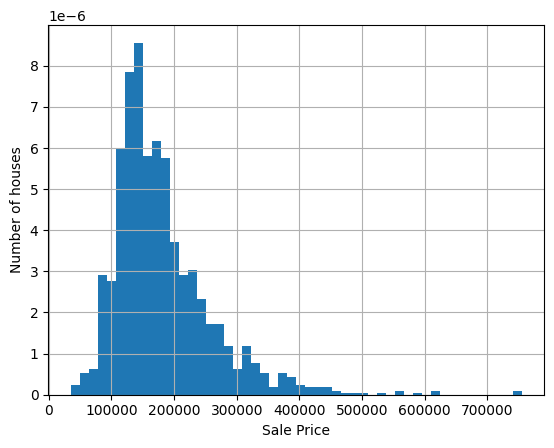

In [87]:
# Hystogram to evaluate target distribution

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("Sale Price")
plt.show()

Here we can see that the distribution is contenious and is also skewed towards the right.

We can improve the value spread with a mathematical transformation

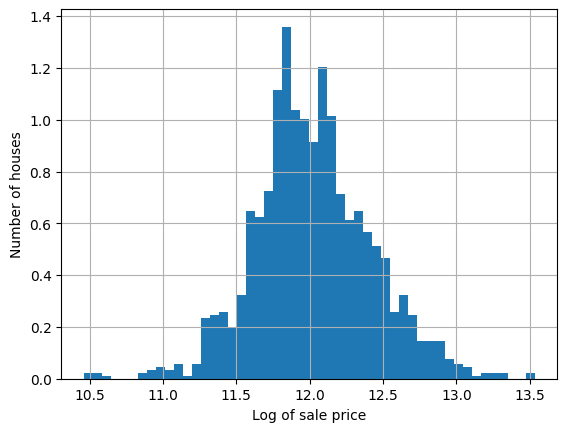

In [88]:
# Using logarithmic transformation on target data

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel("Number of houses")
plt.xlabel("Log of sale price")
plt.show()

Now the above distribution looks like a Gaussian distribution


#### Variable Types

Identifying the catagorical and numerical variables

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [90]:
# Let's identify the catagorical variables 
# We will catch those of type 'object'

cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# As mentioned in the data description MSSubClass is a catagorical variable
cat_vars = cat_vars + ['MSSubClass']

print(len(cat_vars))
cat_vars

44


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [91]:
# Cast all variables as catagorical in cat_vars for double assurance
data[cat_vars] = data[cat_vars].astype('object')

for c in cat_vars:
    if data[c].dtype != 'object':
        print("Fail")
        break
print("Pass")

Pass


In [92]:
# Now getting all the numerical variables

num_vars = [
            var for var in data.columns 
            if var not in cat_vars 
            and var != 'SalePrice'
            ]
print(len(num_vars))
num_vars

35


['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### 3 MISSING VALUES
Now lets figure out the variables that have missing values if any


In [93]:
# Listing the variables that contatins missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values per column
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

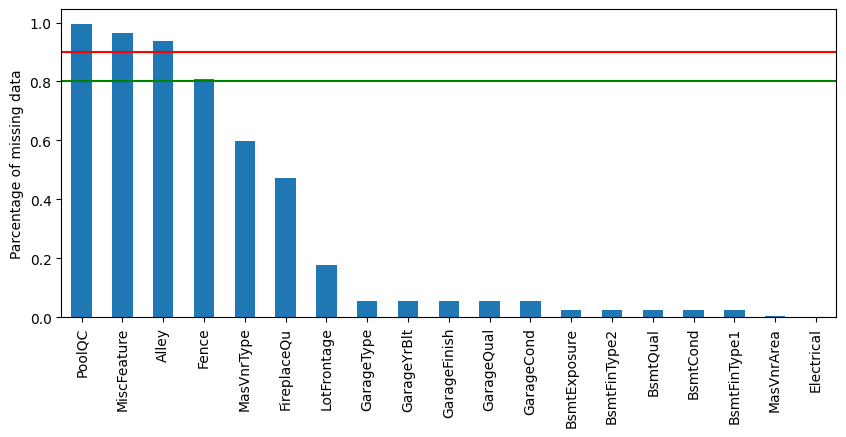

In [94]:
# Plotting the parcentage values
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel("Parcentage of missing data")
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [95]:
# Determine which are numerical or catagorical variables in missing data columns

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print("Number of catagorical columns with null values: ", len(cat_na))
print("Number of numerical variable with null values: ", len(num_na))

Number of catagorical columns with null values:  16
Number of numerical variable with null values:  3


In [96]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [97]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Checking the relationship between missing data columns and Sale price. So that we can determine which columns to remove

In [98]:
def analyse_na_value(df, var):
    # 1. Create a copy of the dataset before making changes
    # 2. Put 1 if the observation is missing other wise 0
    # 3. Group the df by var, aggrigate mean and standard deviation for SalesPrice
    # 4. Plot bar graph for each group
    # 5. Show the plot
    
    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)

    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='g')
    
    plt.show()


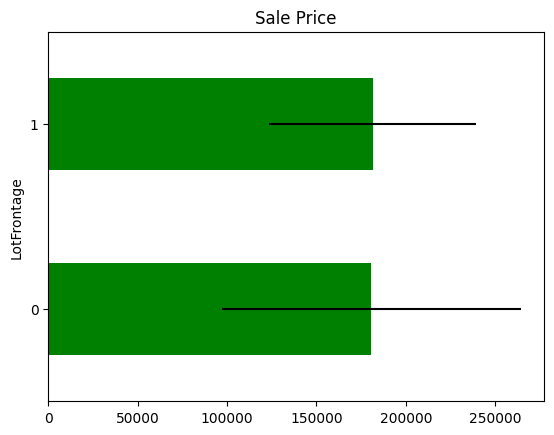

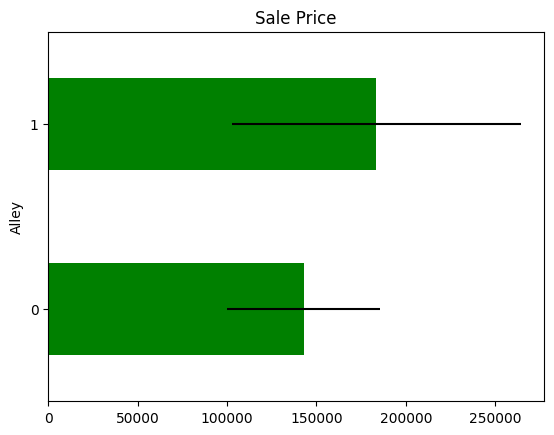

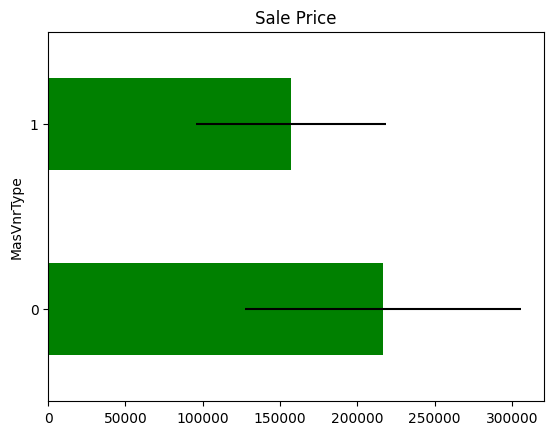

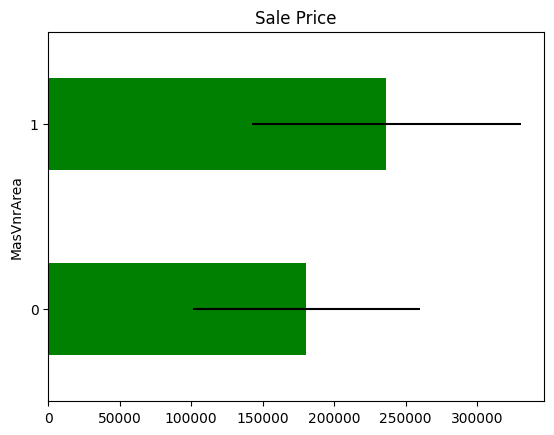

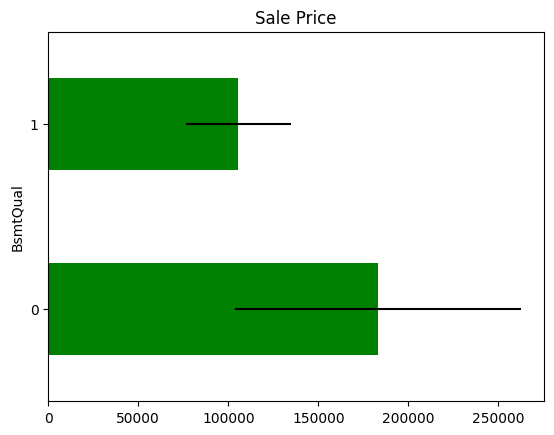

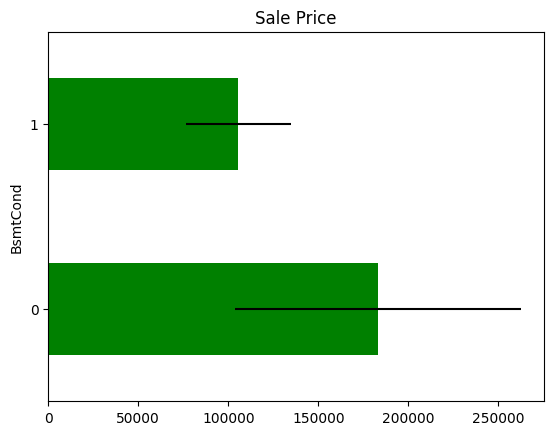

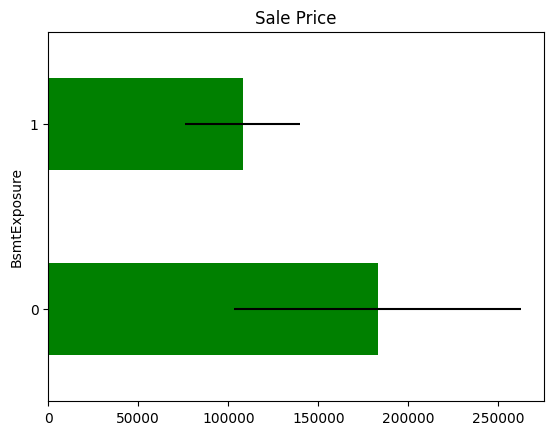

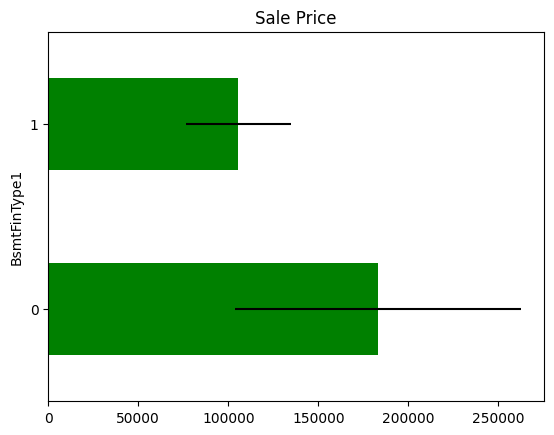

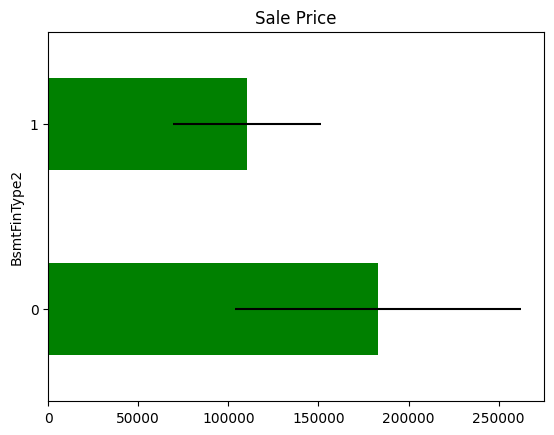

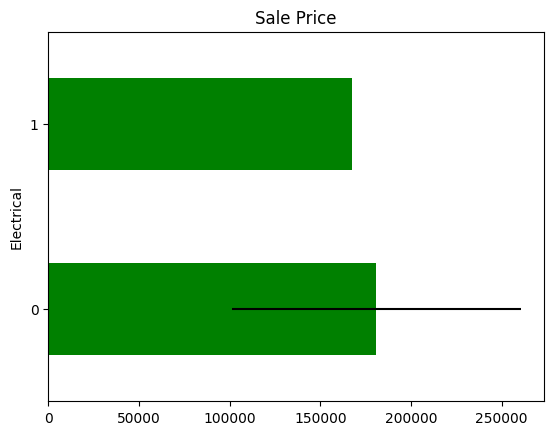

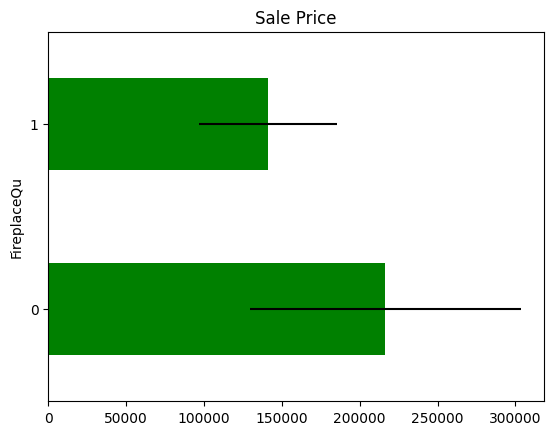

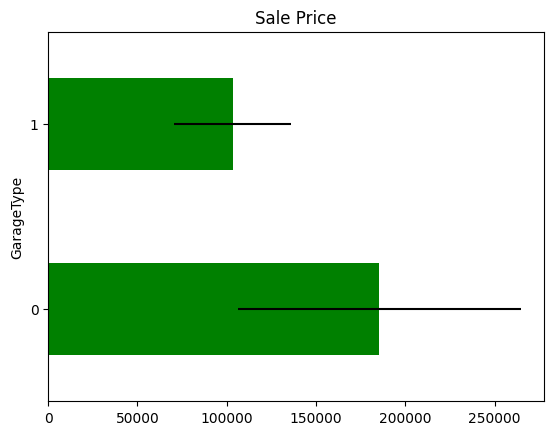

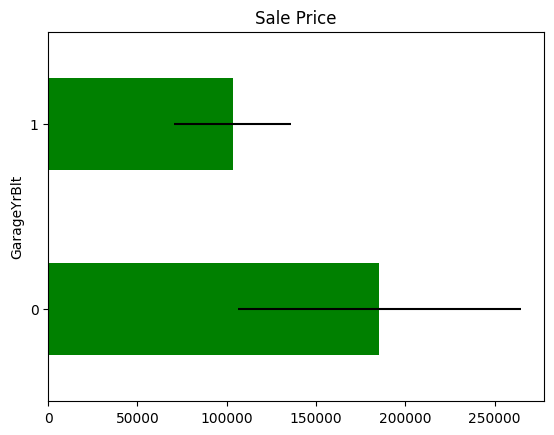

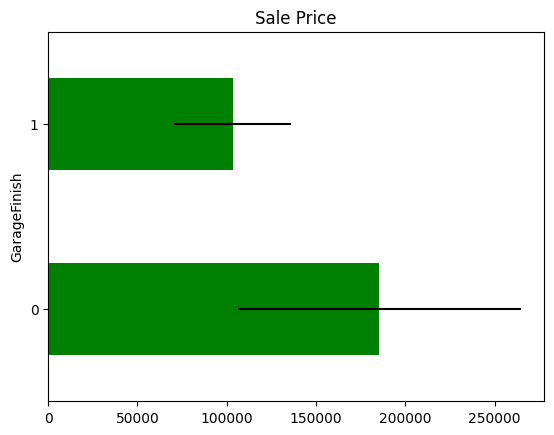

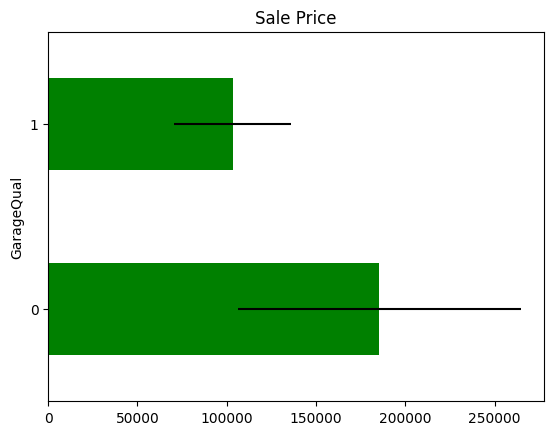

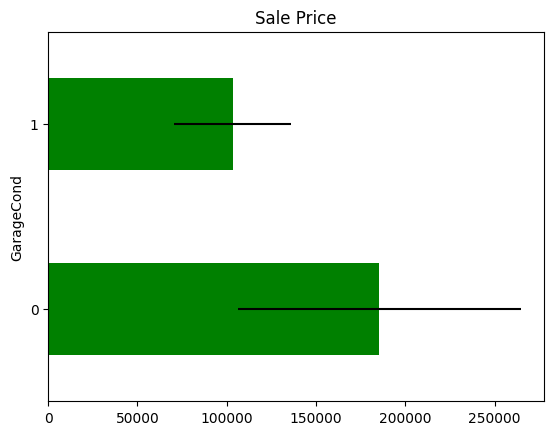

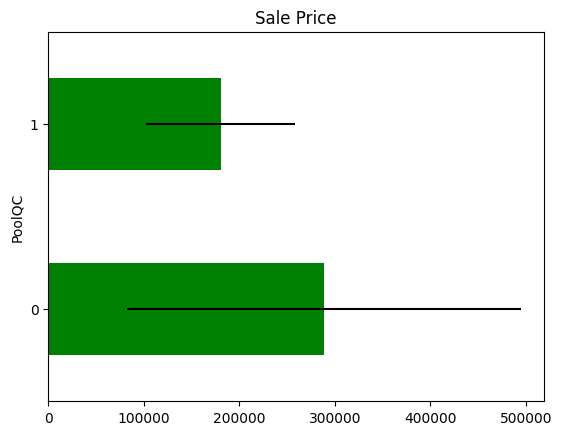

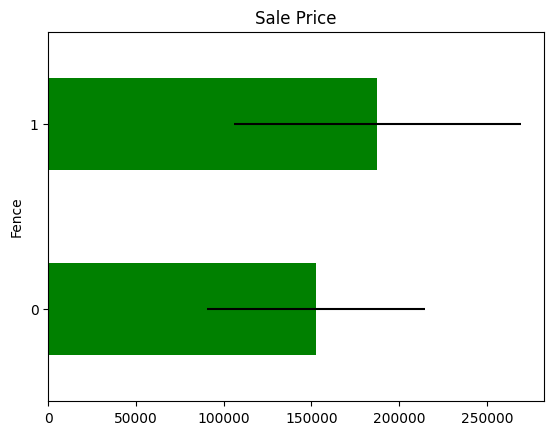

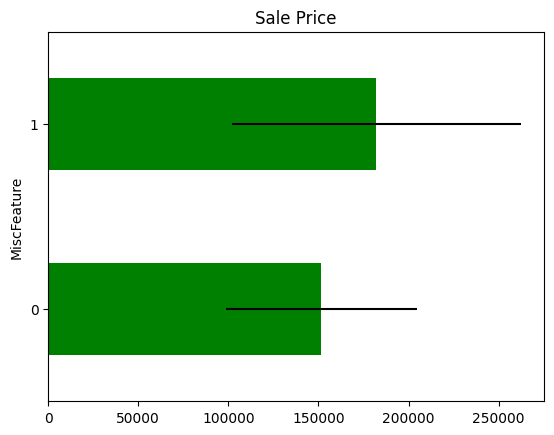

In [99]:
# Running the above functio for each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

# Note: We can see some of the variables effect the mean of Sale Price if
# the variable contains the missing values rather then removing the missing values

#### Numerical Variables
Lets find out what numerical variables we have in the dataset

In [100]:
print(f"Number of numerical valiables: {len(num_vars)}")

# Visualize the numerical variables
data[num_vars].head()

Number of numerical valiables: 35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


#### Temporal Variables
There are 4 Temporal variables
* YearBuilt
* YearRemodAdd
* GarageYrBlt
* YrSold

So generally we should not use the variables directly if they are temporal. Mostly we should extract informatin from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold

In [101]:
# List of variables containing year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [102]:
# Exploring the unique values of the temporal variables
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Exploring the evolution of the sale price with the year in which the house was sold:

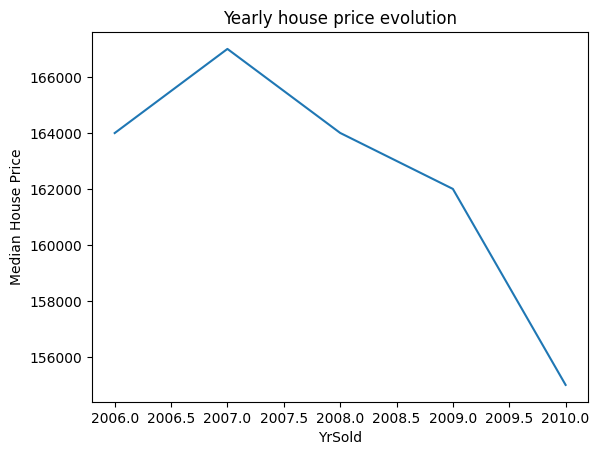

In [103]:
# Plotting median sale price vs year in which it was sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.title("Yearly house price evolution")
plt.ylabel("Median House Price")
plt.show()

We can see that there is a drop in the price of the houses. This is unusual, in real life, house price typically go up as years go by. 

Exploring it further

Plotting the price of sale vs year in which it was built

Text(0, 0.5, 'Median House Price')

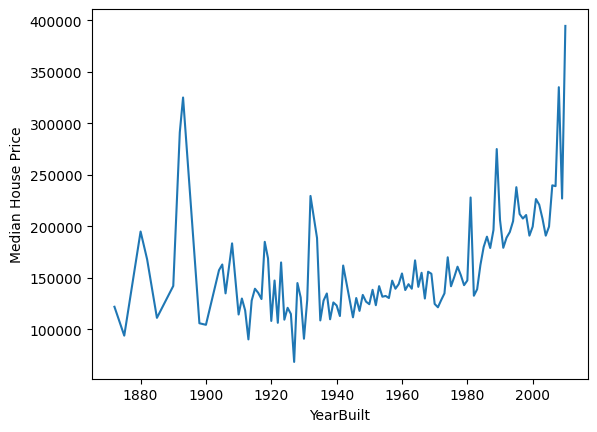

In [104]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

We can see that newly built houses tend to be more expensive.

It could be that the houses that were sold lately are actually older houses.

For this, we will capture the elapsed years between the year variables and the year in which the house was sold

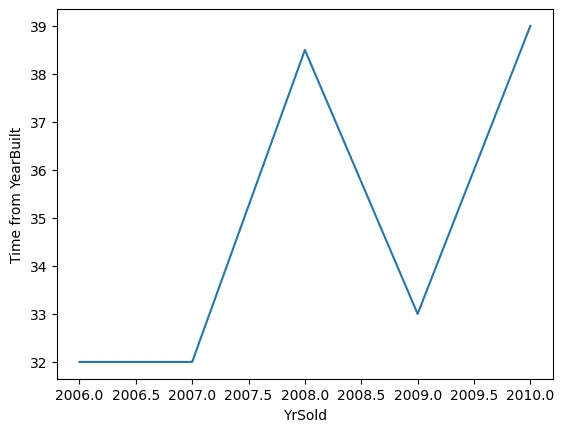

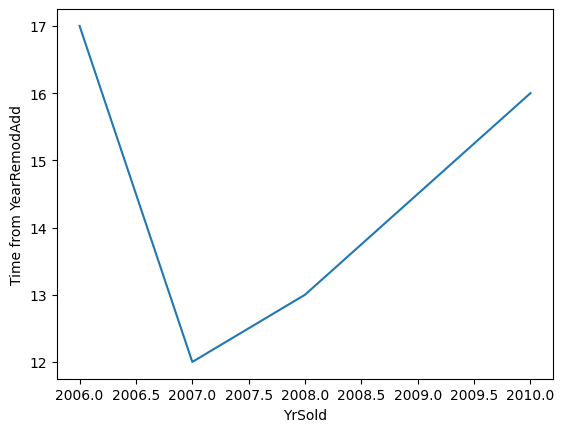

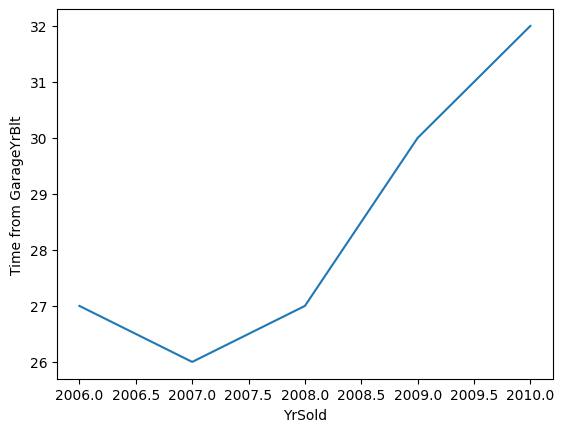

In [105]:
def analysis_year_vars(df, var):
    df = df.copy()

    # Capture the difference between a year variable and year
    # in which the house was sold

    df[var] = df['YrSold'] - df[var]

    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)

    plt.show()

# Now we can use the year variable that we have stored earlier
for var in year_vars:
    if var != 'YrSold':
        analysis_year_vars(data, var)

From the plots its evident that towars 2010, the houses sold had older garages and had not been remodelled recently, that might explain why we see house price drop in the recent year.

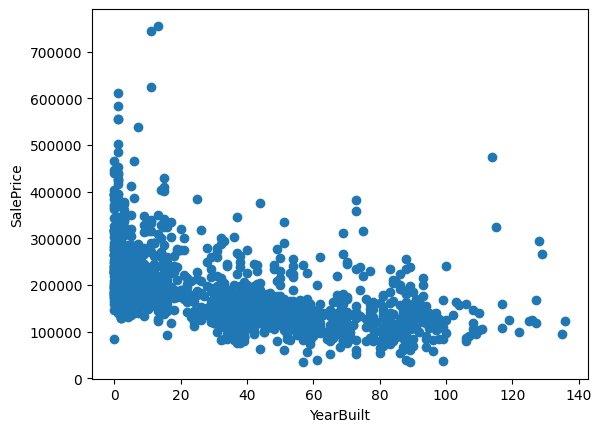

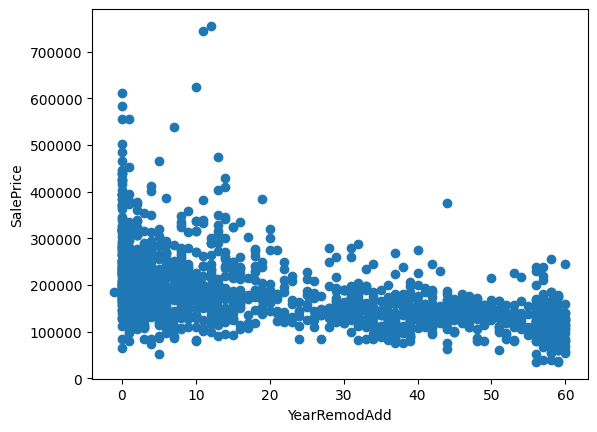

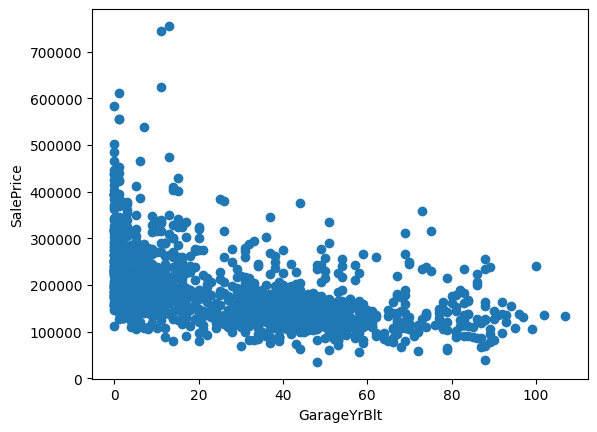

In [106]:
# Plotting time since last remodeled, or time science built and sale price, to see
# if there is any relationship.

# Elapsed time vs sale price
def analyse_year_since(df, var):
    df = df.copy()

    # Capture difference between a year variable and year in which the house
    # was sold
    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt. show()

for var in year_vars:
    if var != 'YrSold':
        analyse_year_since(data, var)

So here we can see that there is a tendency to a decrease in price, with older houses, In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale price.

Which makes sense, because the house will have a older look and potentially needs repairs. 

#### DISCRETE VARIABLES
Now to figure out which variables are discrete, i.e., shows a finate number of values

In [107]:
# List of discrete variables (Numerical variables having finate values in column)
discrete_var = [var for var in num_vars if len(data[var].unique()) < 20
                and var not in year_vars]

print(f"Number of discrete variables: {len(discrete_var)}")

Number of discrete variables: 13


In [108]:
data[discrete_var].head(5)

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


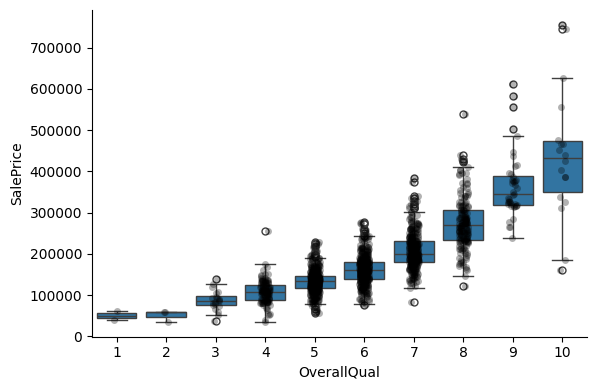

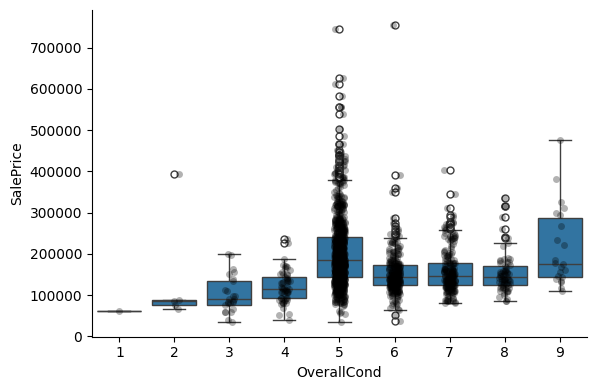

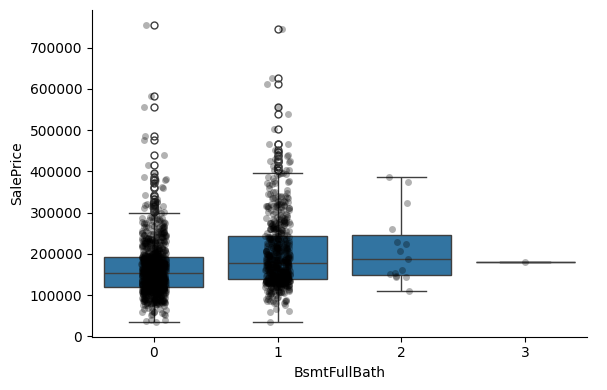

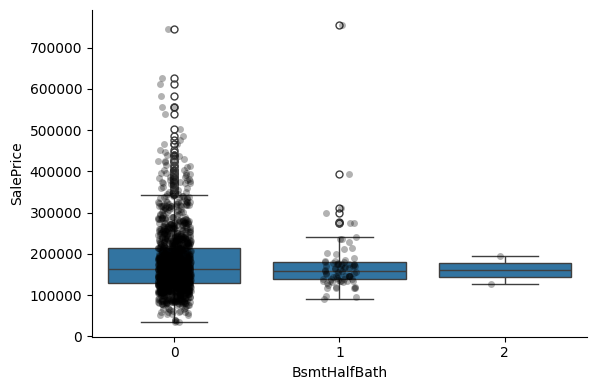

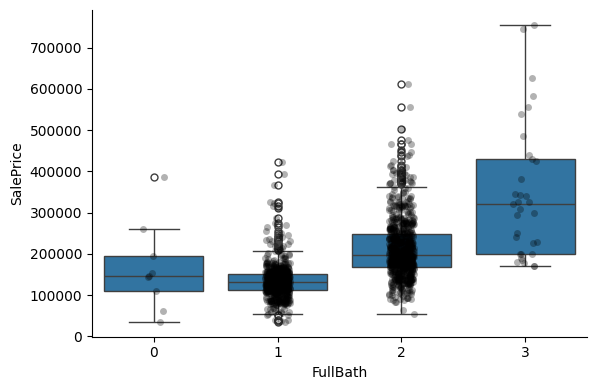

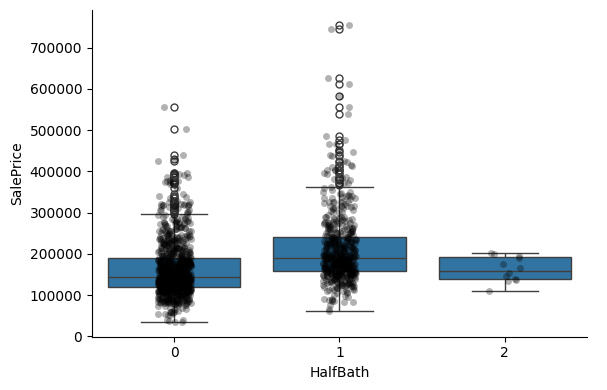

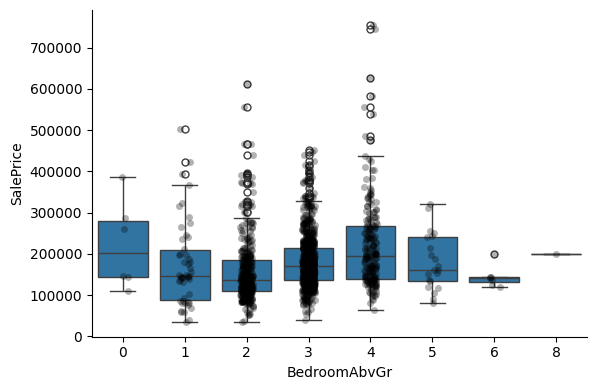

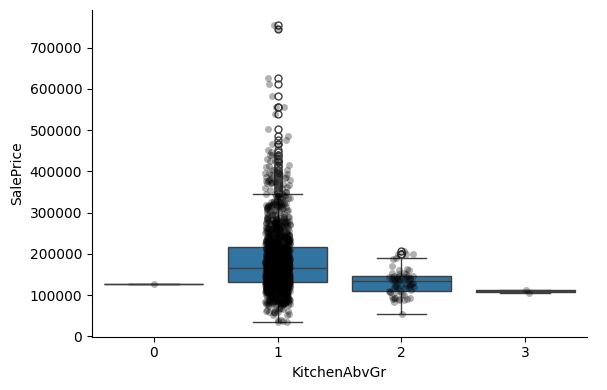

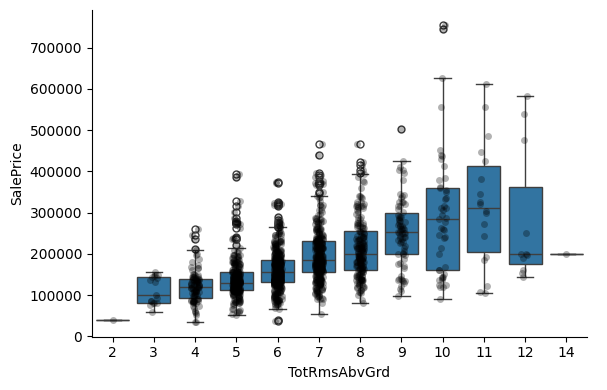

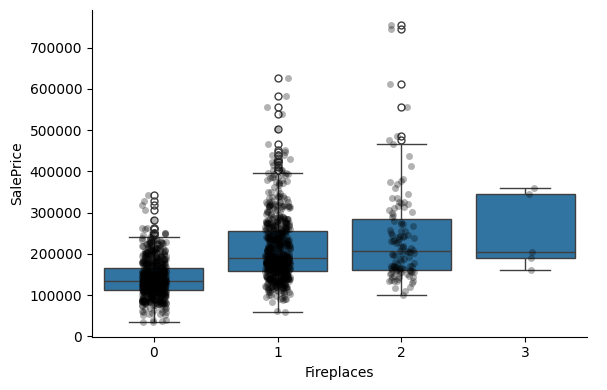

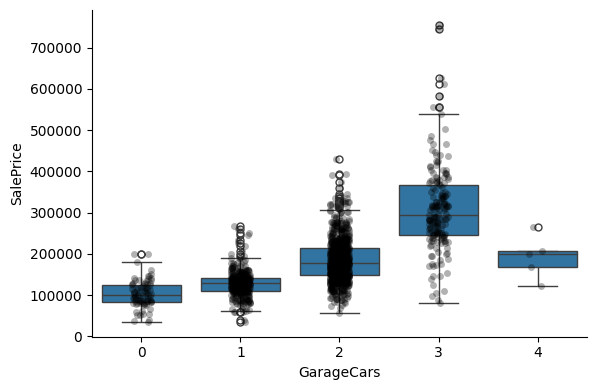

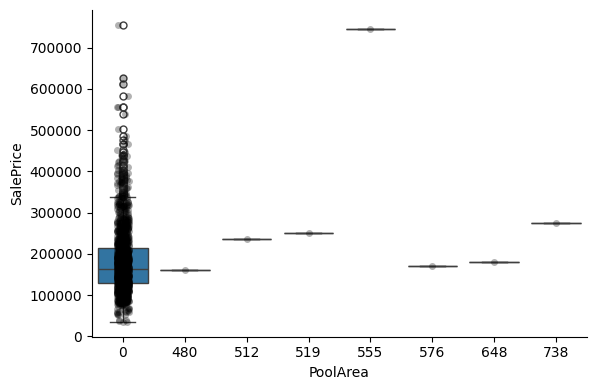

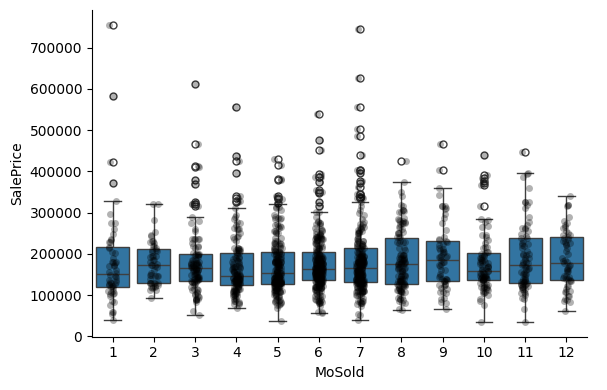

In [109]:
for var in discrete_var:
    # Make boxplot with Carplot
    # Add data points to boxplot with stripplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most of the discrete variables, we see an increase in sale price, with the quality, or overall condition, or number of rooms or surface.

For some variables, we don't see the tendency. Most likely those variables are not good predictors of sale price

#### CONTINUOUS VARIABLES
We will consider continuous variables to all those numerical variables that are not temporal variables or discrete variables

In [110]:
# Making list of continuous variables
cont_var = [var for var in num_vars if var not in discrete_var+year_vars]

print(f"Number of contenious variables: {len(cont_var)}")

Number of contenious variables: 18


In [111]:
data[cont_var].head(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


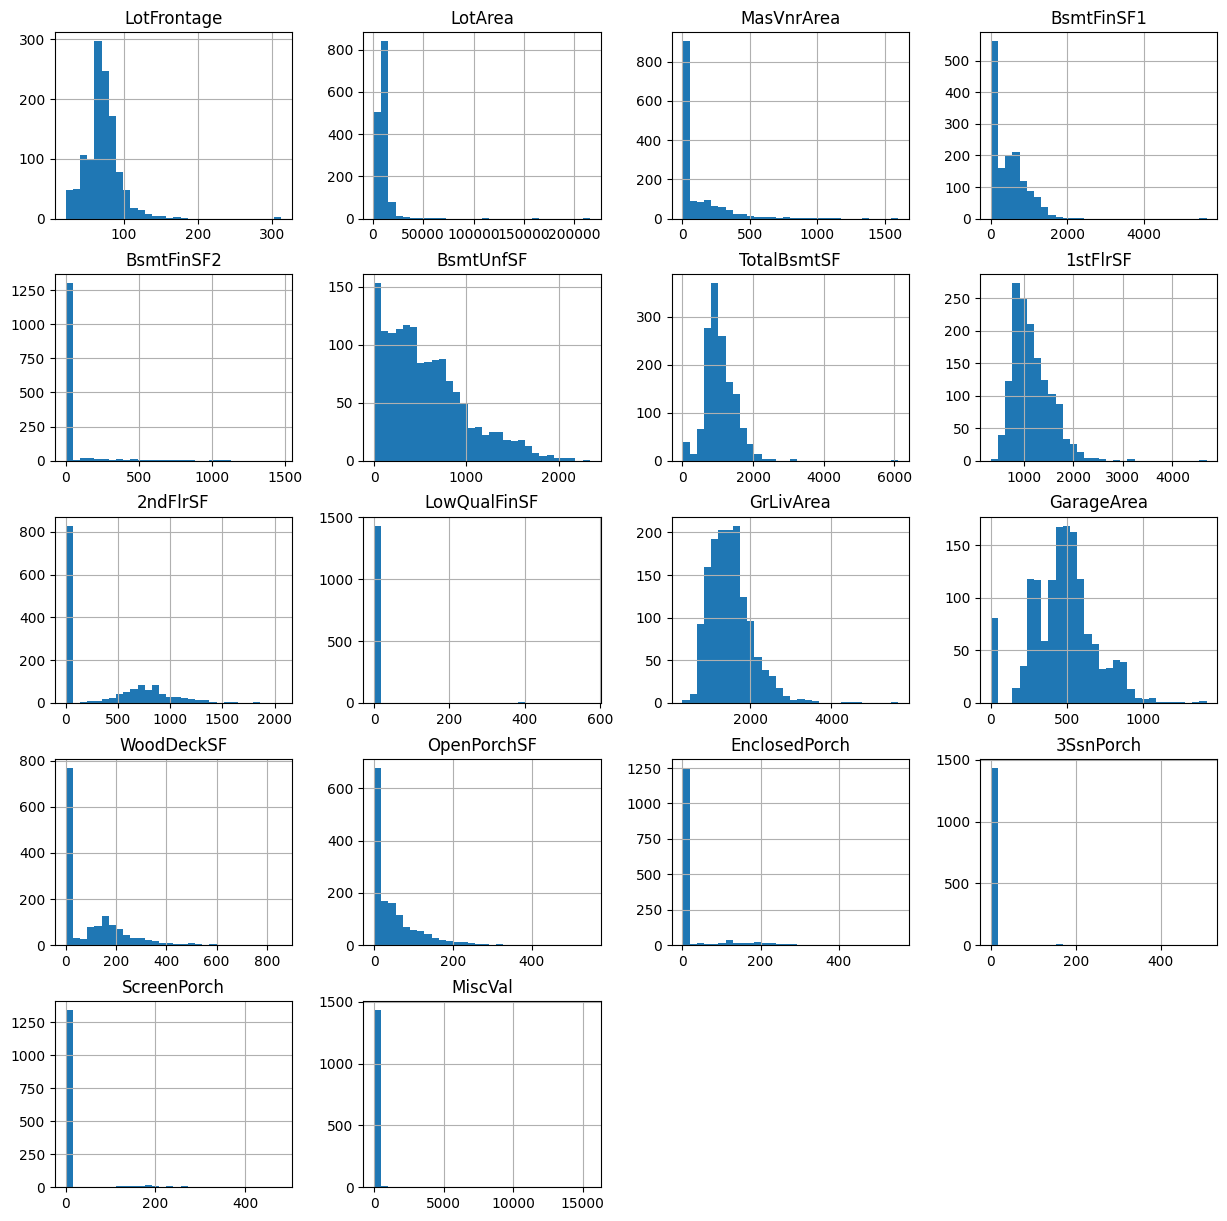

In [112]:
# Plotting hystogram for all contenious variables
data[cont_var].hist(bins=30, figsize=(15, 15))
plt.show()

The variables are not normally distributed. And there are a particular few that are extremely skewed like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, transforming the variables to imporove the value spread helps increase the model performance. But it is unlikely that the transformations will help change the distribution of the super skewed variables dramatically.

We can apply a Yeo-Johson transformation to variables like LotFrontage, LotArea, BsmUnfSE, and a binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal. 

Let's go ahead and do that. 

In [113]:
# First make a list with the super skewed variables for later 

skewed = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
          '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [114]:
# Now capturing the remaining continuous variables

cont_vars = [
    'LotFrontage', 
    'LotArea', 
    'MasVnrArea', 
    'BsmtFinSF1', 
    'BsmtUnfSF',
    'TotalBsmtSF', 
    '1stFlrSF', 
    '2ndFlrSF', 
    'GrLivArea', 
    'WoodDeckSF',
    'OpenPorchSF',
]

#### Applying Yeo-Johnson transformation
Handle null data and infinite values before applying Yeo-Johnson transfom

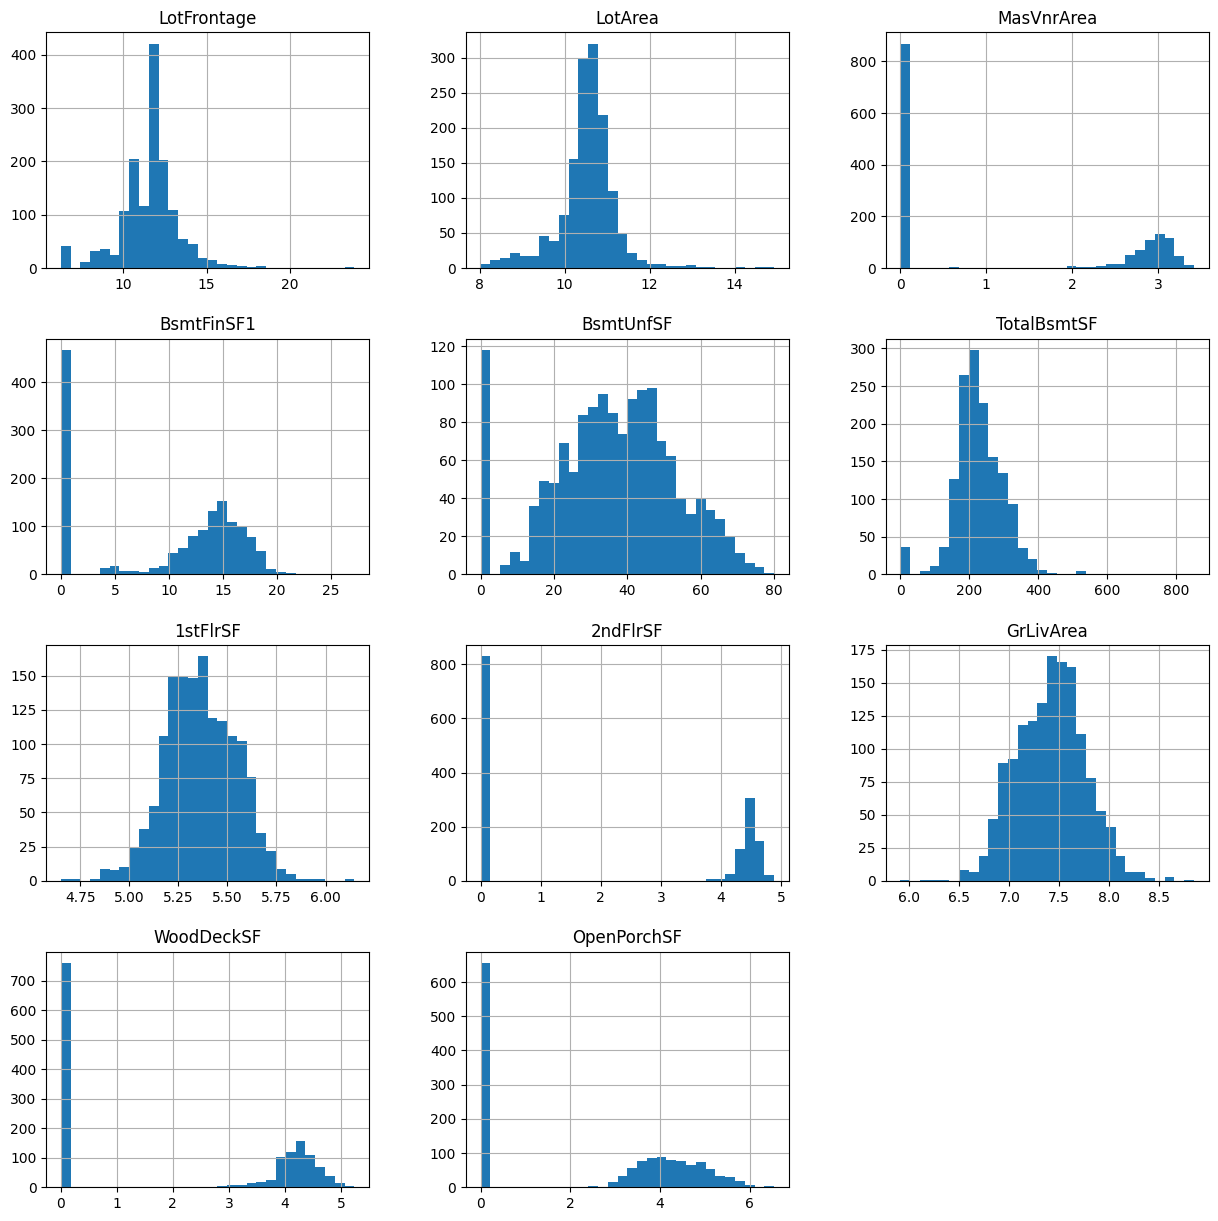

In [118]:
# copying data before transformation
tmp = data.copy()

# Yeo-Johnson creates problem if ther is null data or infinite values 
for var in cont_vars:
    # Replacing infinite values with NaN
    tmp[var] = tmp[var].replace([np.inf, -np.inf], np.nan)

    # Impute missing values (fill NaNs with the column mean or median)
    tmp[var] = tmp[var].fillna(tmp[var].median())

for var in cont_vars:
    tmp[var], param = stats.yeojohnson(tmp[var])

# plotting histogram for transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15, 15))
plt.show()

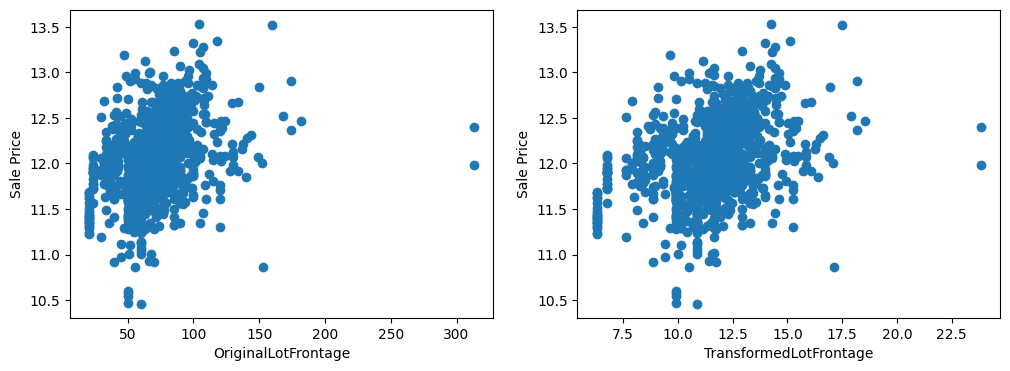

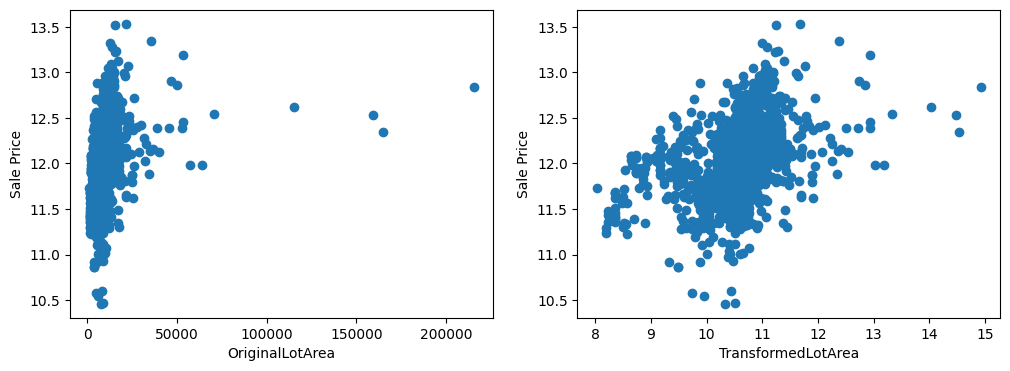

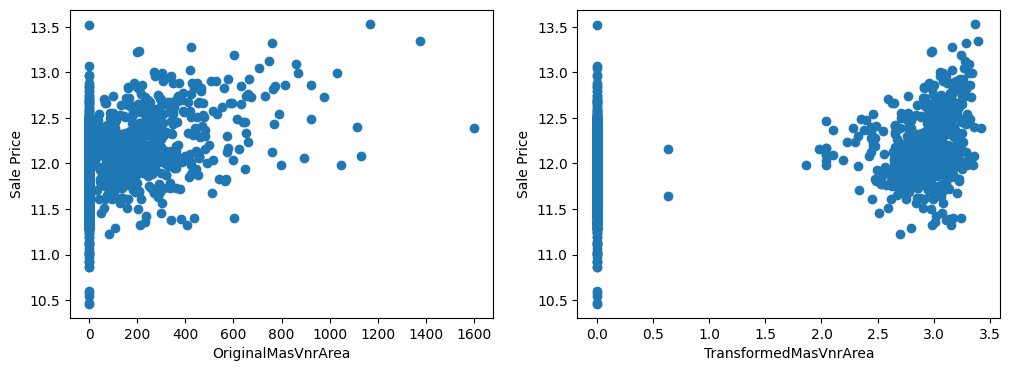

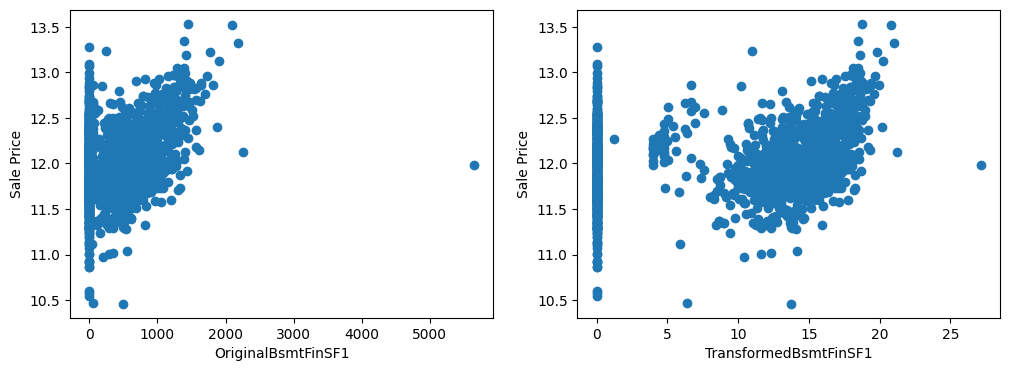

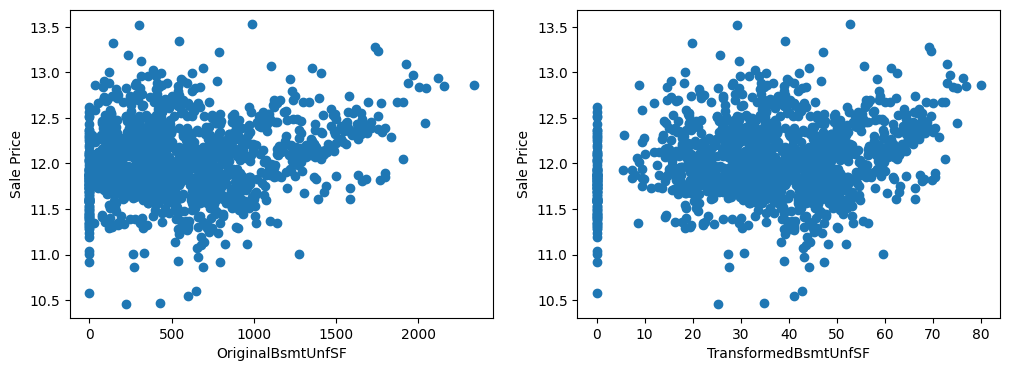

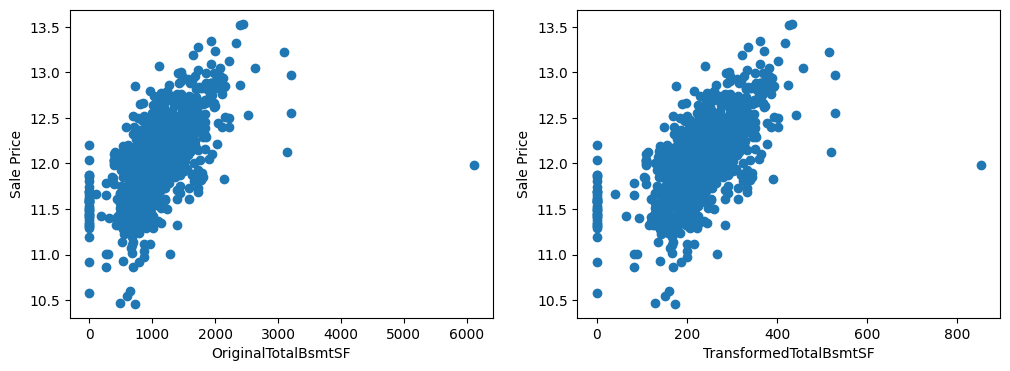

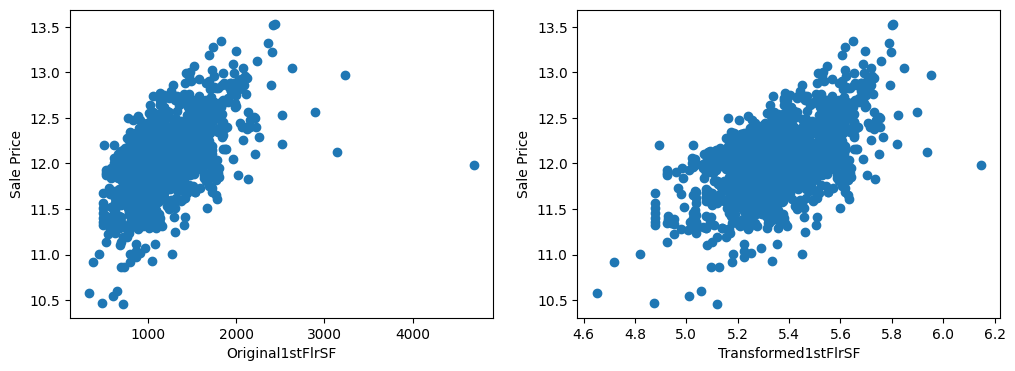

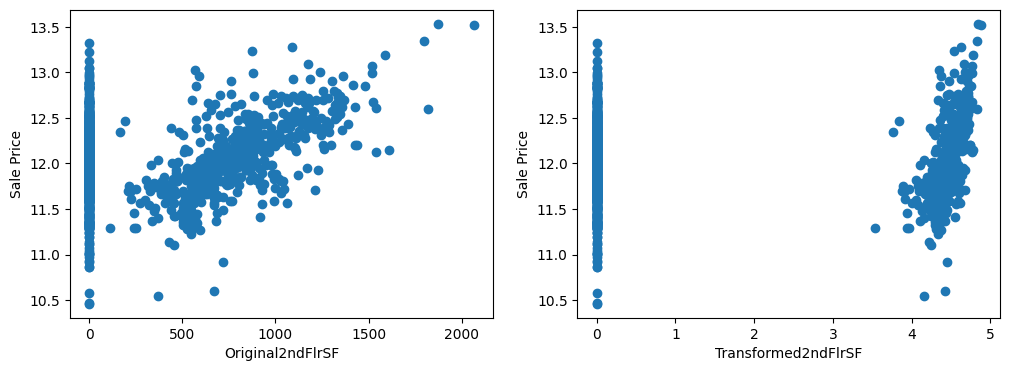

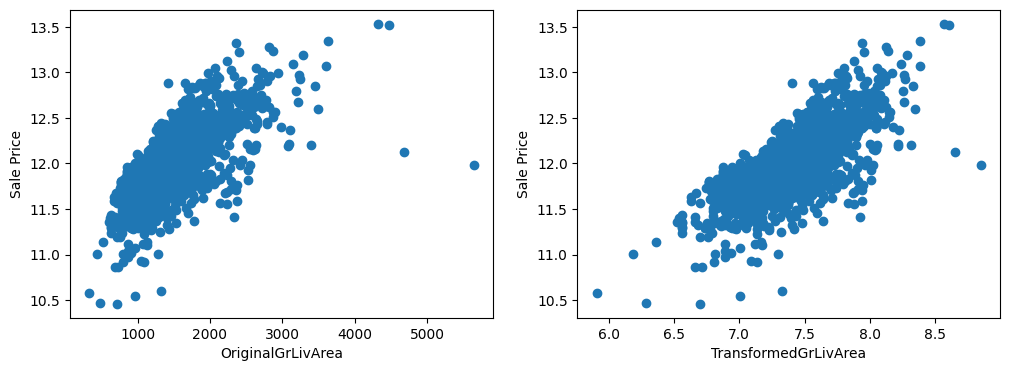

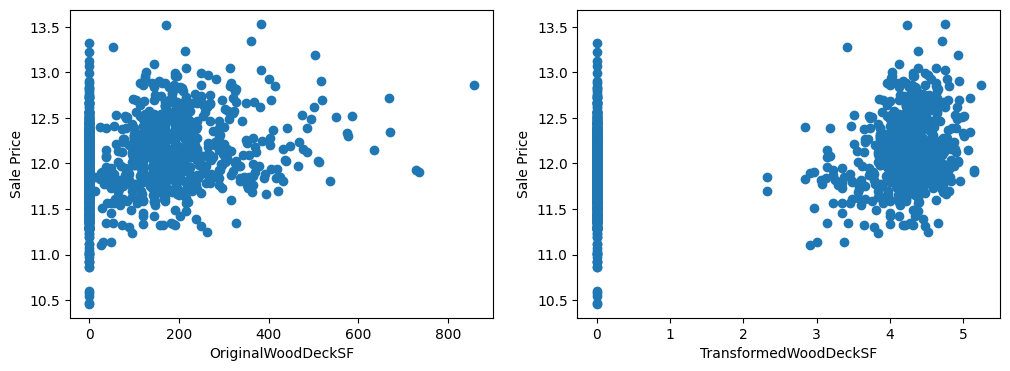

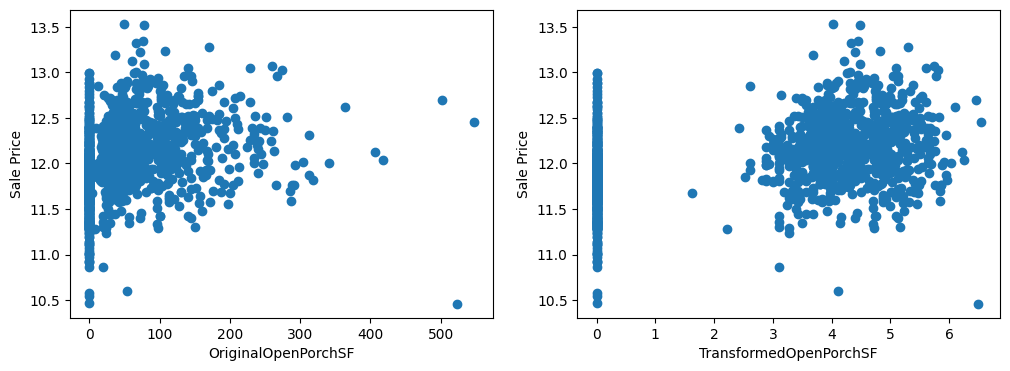

In [120]:
# let's plot the original or transformed variables vs sale price
# to check for relationship

for var in cont_vars:
    plt.figure(figsize=(12, 4))

    # Plot the original variable vs sale price
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original' + var)

    # Plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed' + var)

    plt.show()

#### Logarithmic Transformation


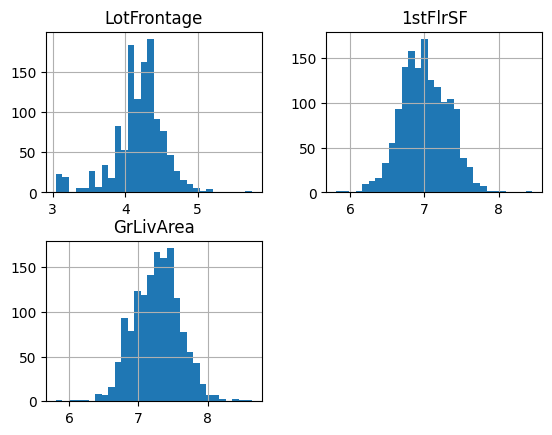

In [123]:
# Applying logarithmic transformation on the below variables
# Logarithmic transformation can only be applied to positive numbers but many 
# of the variables have value zero

tmp = data.copy()

for var in ['LotFrontage', "1stFlrSF", "GrLivArea"]:
    # transform the variable with logarithm
    tmp[var] = np.log(data[var])

tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

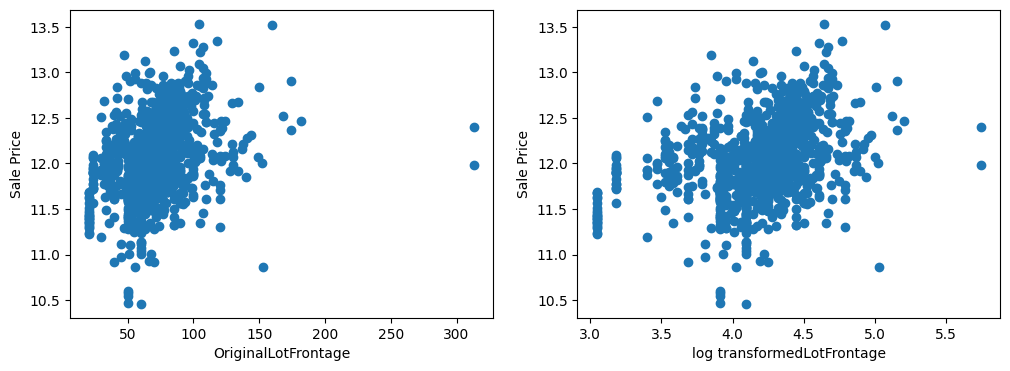

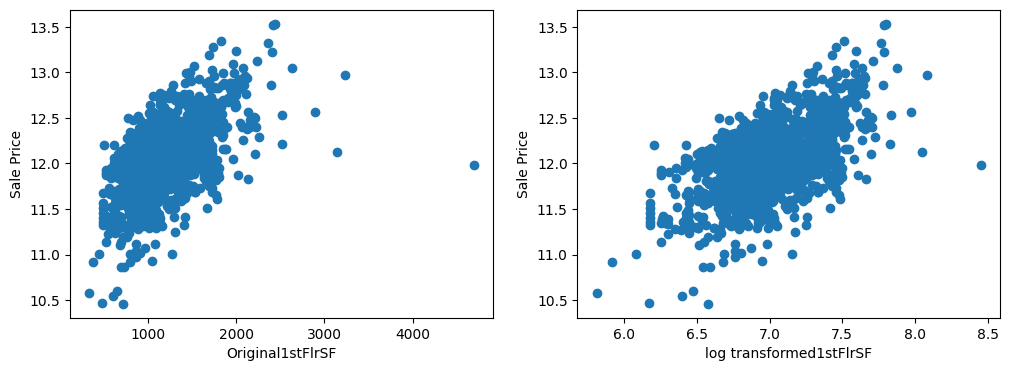

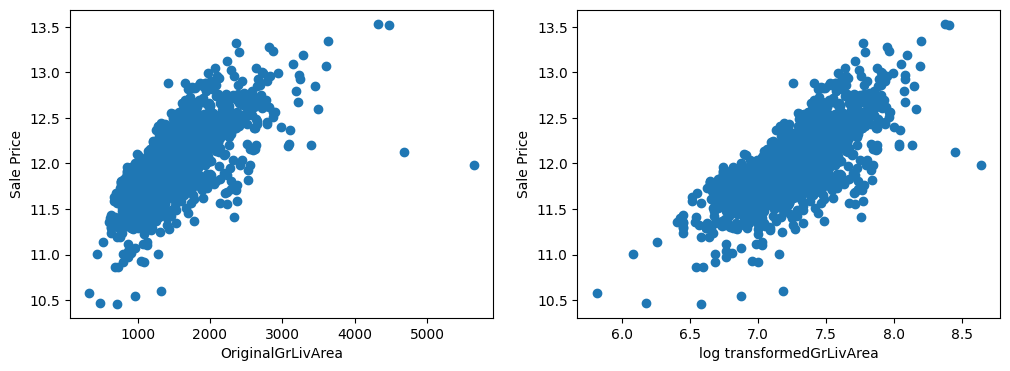

In [124]:
# Checking the relation of log transformed variables with the target

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original'+var)

    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('log transformed'+var)

    plt.show()

#### Skewed variables
If the skewd value is 0 we keep it to 0 if there is another value other then 0 then we make it 1

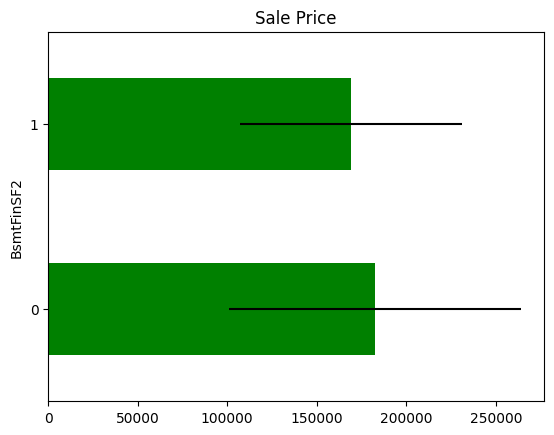

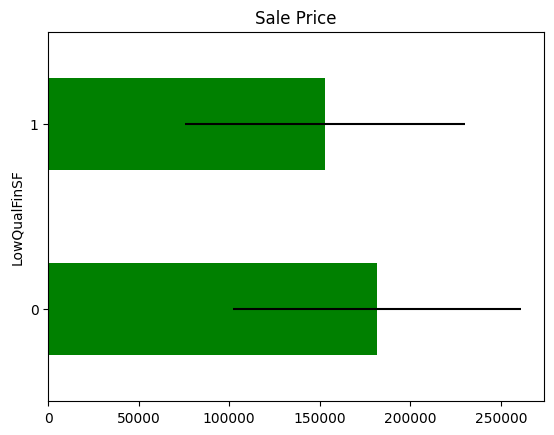

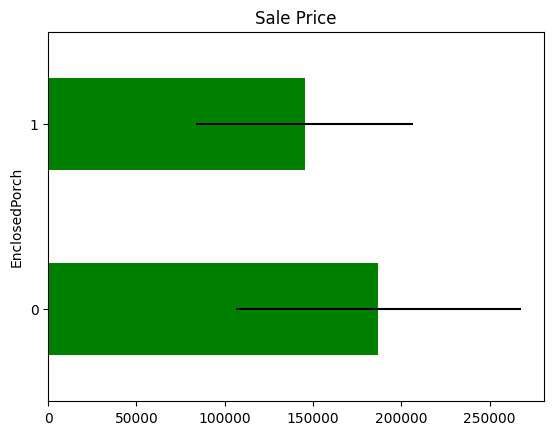

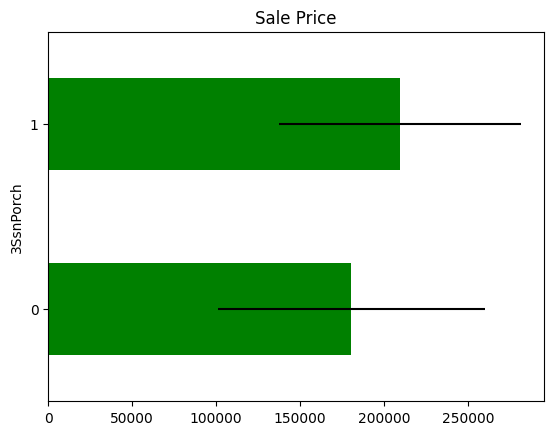

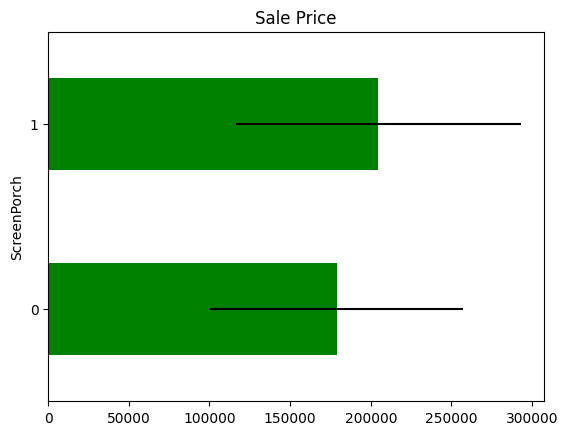

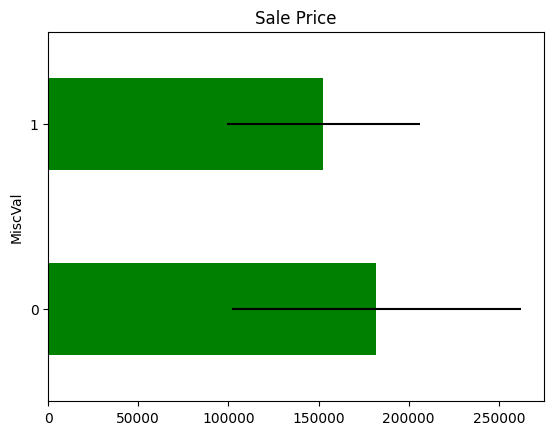

In [125]:
for var in skewed:
    tmp = data.copy()

    # map the variables values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)

    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y='mean', legend=False, 
             xerr="std", title="Sale Price", color='green')
    
    plt.show()

#### Catagorical variable
Number of labels: Cardinality

Let's evaluate how many different catagories are present in each of the variables.

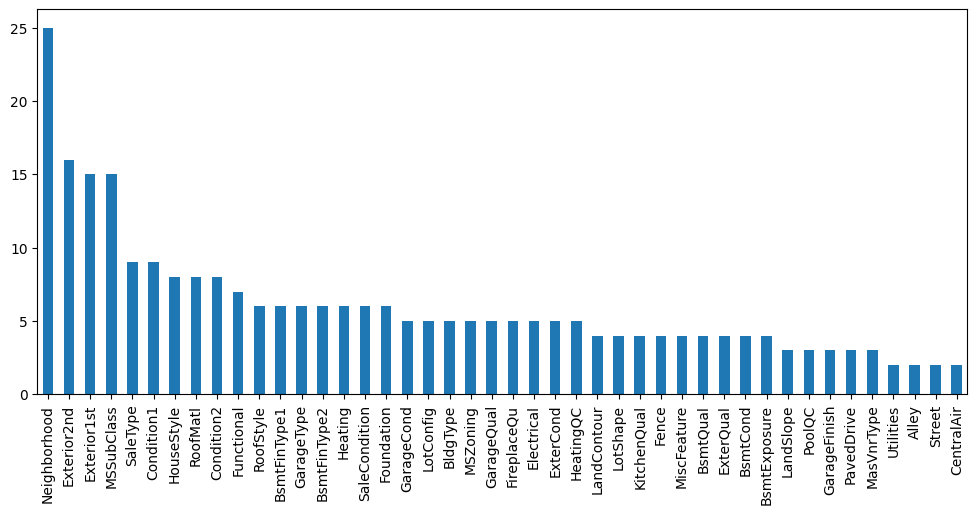

In [127]:
# We count unique catagories with pandas unique()
# And then plot them in descending order 

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))
plt.show()

So here we can see that the variable(column) Neighborhood has the highest cardinality having 25 different neighbourhood in the column. 